In [1]:
import numpy as np
import pandas as pd
import xarray as x
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
data_ECHAM = x.open_dataset("C:/Users/milan/OneDrive - Delft University of Technology/Project_Y2Q3-4/AT20_optimal/DT12/ECHAM/f05____________20181001_0000_ECHAM5.nc")
data_ECHAM

<xarray.Dataset>
Dimensions:      (time: 62, lon: 128, lat: 64, lev: 31, ilev: 32, tbnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2018-10-01 ... 2018-10-31T12:00:00
  * lon          (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat          (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lev          (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * ilev         (ilev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0 32.0
Dimensions without coordinates: tbnds
Data variables: (12/85)
    YYYYMMDD     (time) float64 ...
    dt           (time) float64 ...
    nstep        (time) float64 ...
    hyam         (lev) float32 ...
    hybm         (lev) float32 ...
    hyai         (ilev) float32 ...
    ...           ...
    sigmadot     (time, ilev, lat, lon) float32 ...
    tke          (time, lev, lat, lon) float32 ...
    ocu          (time, lat, lon) float32 ...
    ocv          (time, lat, lon) float32 ...
    aps          (time, lat, lon) float32 ...
    time_bnds    (time, tbnds) datetime64[ns] ...
Attributes: (12/49)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    channel_io_pe:            0
    channel_time_slo:         84000.0
    channel_name:             ECHAM5
    channel_file_type:        output
    channel_file_name:        f05____________20181001_0000_ECHAM5.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [18]:
#Check date

data_ECHAM.isel(time = 9)

<xarray.Dataset>
Dimensions:      (lon: 128, lat: 64, lev: 31, ilev: 32, tbnds: 2)
Coordinates:
    time         datetime64[ns] 2018-10-05T12:00:00
  * lon          (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat          (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lev          (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * ilev         (ilev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0 32.0
Dimensions without coordinates: tbnds
Data variables: (12/85)
    YYYYMMDD     float64 ...
    dt           float64 ...
    nstep        float64 ...
    hyam         (lev) float32 ...
    hybm         (lev) float32 ...
    hyai         (ilev) float32 ...
    ...           ...
    sigmadot     (ilev, lat, lon) float32 ...
    tke          (lev, lat, lon) float32 ...
    ocu          (lat, lon) float32 ...
    ocv          (lat, lon) float32 ...
    aps          (lat, lon) float32 ...
    time_bnds    (tbnds) datetime64[ns] ...
Attributes: (12/49)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    channel_io_pe:            0
    channel_time_slo:         84000.0
    channel_name:             ECHAM5
    channel_file_type:        output
    channel_file_name:        f05____________20181001_0000_ECHAM5.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [19]:
#rainrate

rsfl = data_ECHAM['rsfl_2d'].isel(time = 9)
rsfc = data_ECHAM['rsfc_2d'].isel(time = 9)
rainr = rsfc + rsfl

#snowrate

ssfl = data_ECHAM['ssfl_2d'].isel(time = 9)
ssfc = data_ECHAM['ssfc_2d'].isel(time = 9)
snowr = ssfc + ssfl

humidity = data_ECHAM['rhum'].isel(time = 9, lev = 10)

cloudwater = data_ECHAM['xlm1'].isel(time = 9, lev = 10)

cloudice = data_ECHAM['xim1'].isel(time = 9, lev = 10)

vertwinds = data_ECHAM['etadot'].isel(time = 9, ilev = 10)

dryair_temp = data_ECHAM['tm1'].isel(time = 9, lev = 10)

In [23]:
# u & v winds

# u-winds
u_wind = data_ECHAM['um1'].isel(time = 9, lev = 10)
u_wind = x.concat([u_wind.sel(lon=slice(0., 60.)), u_wind.sel(lon=slice(335., 360.))], dim="lon")
u_wind = u_wind.sel(lat=slice(80., 20.))


# v-winds

v_wind = data_ECHAM['vm1'].isel(time = 9, lev = 10)
v_wind = x.concat([v_wind.sel(lon=slice(0., 60.)), v_wind.sel(lon=slice(335., 360.))], dim="lon")
v_wind = v_wind.sel(lat=slice(80., 20.))

# u-winds & v-winds altogether [m s^-1]

lon, lat = np.meshgrid(u_wind.lon, u_wind.lat)

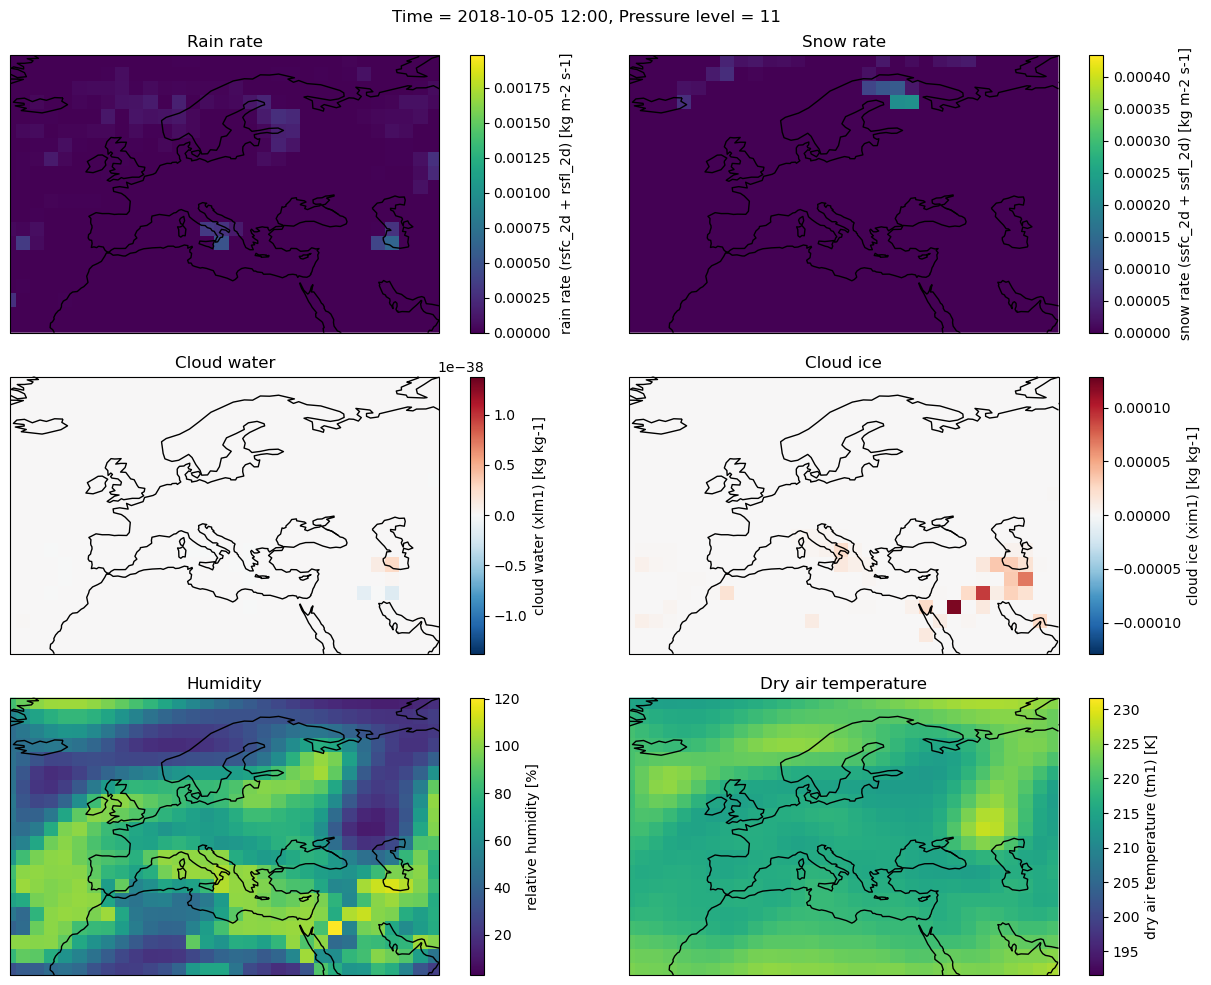

In [24]:
# Plotting weather heatmaps except winds

fig, axes = plt.subplots(3, 2, figsize=(13, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot rainrate
ax1 = axes[0, 0]
ax1.coastlines()
extent = [-25, 60, 20, 70]
ax1.set_extent(extent)
p1 = rainr.plot(transform=ccrs.PlateCarree(), ax=ax1)
ax1.set_title('Rain rate')

# Plot snowrate
ax2 = axes[0, 1]
ax2.coastlines()
ax2.set_extent(extent)
p2 = snowr.plot(transform=ccrs.PlateCarree(), ax=ax2)
ax2.set_title('Snow rate')

# Plot cloudwater
ax3 = axes[1, 0]
ax3.coastlines()
ax3.set_extent(extent)
p3 = cloudwater.plot(transform=ccrs.PlateCarree(), ax=ax3)
ax3.set_title('Cloud water')

# Plot cloud ice
ax4 = axes[1, 1]
ax4.coastlines()
ax4.set_extent(extent)
p4 = cloudice.plot(transform=ccrs.PlateCarree(), ax=ax4)
ax4.set_title('Cloud ice')

# Plot humidity
ax5 = axes[2, 0]
ax5.coastlines()
ax5.set_extent(extent)
p5 = humidity.plot(transform=ccrs.PlateCarree(), ax=ax5)
ax5.set_title('Humidity')

# Plot dry air temperature
ax6 = axes[2, 1]
ax6.coastlines()
ax6.set_extent(extent)
p6 = dryair_temp.plot(transform=ccrs.PlateCarree(), ax=ax6)
ax6.set_title('Dry air temperature')

plt.suptitle('Time = 2018-10-05 12:00, Pressure level = 11')


plt.tight_layout()


#add description to rainrate and snowrate plots, as combining large-scale and convective removes the otherwise standard description

right_subplot = axes[0, 0] 
description = "rain rate (rsfc_2d + rsfl_2d) [kg m-2 s-1]"
x_offset = 0.05
y_offset = 0.5
right_subplot.annotate(description, xy=(1.28, 0.5), xytext=(x_offset, y_offset),
                       xycoords='axes fraction', textcoords='offset points',
                       ha='left', va='center', rotation='vertical')

right_subplot = axes[0, 1]
description = "snow rate (ssfc_2d + ssfl_2d) [kg m-2 s-1]"
x_offset = 0.05
y_offset = 0.5
right_subplot.annotate(description, xy=(1.28, 0.5), xytext=(x_offset, y_offset),
                       xycoords='axes fraction', textcoords='offset points',
                       ha='left', va='center', rotation='vertical')


plt.show()

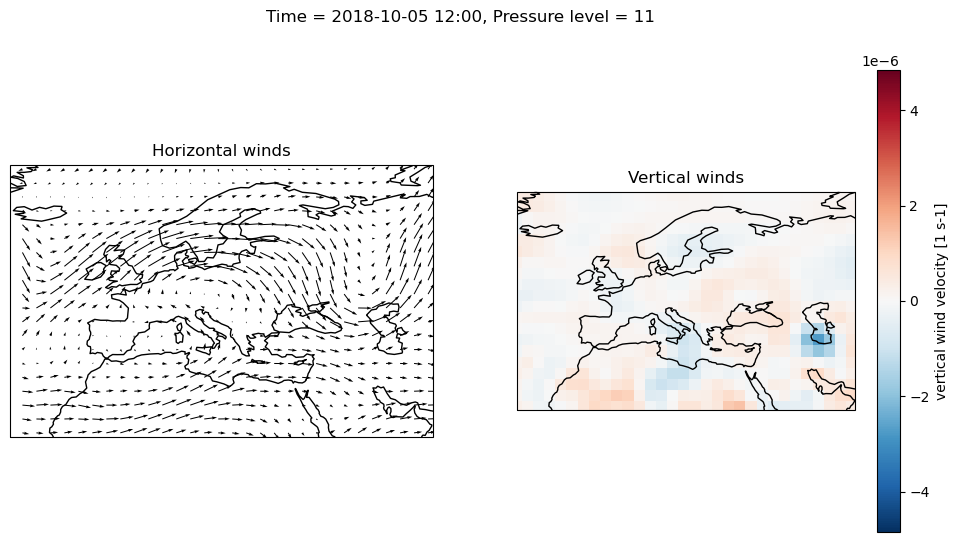

In [25]:
#Plotting winds

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

extent = [-25, 60, 20, 70]
ax1.set_extent(extent)
ax1.coastlines()
ax1.quiver(lon, lat, u_wind, v_wind)
ax1.set_title('Horizontal winds')

ax2.coastlines()
ax2.set_extent(extent)
p2 = vertwinds.plot(transform=ccrs.PlateCarree(), ax=ax2)
ax2.set_title('Vertical winds')

plt.suptitle('Time = 2018-10-05 12:00, Pressure level = 11')

plt.show()
